# # **ML in Drug Discovery using SWISSADME properties**



SWISSADME properties to build machine learning models for drug discovery is a great idea. SWISSADME gives you molecular descriptors and ADME (Absorption, Distribution, Metabolism, Excretion) properties—ideal features for predicting drug-likeness, activity, or toxicity

# **Here’s a step-by-step guide, including code, on how to:**

Load SWISSADME data

Preprocess

Train multiple ML models

Evaluate and compare them

In [1]:
#🔬 Step 1: Install Necessary Libraries
!pip install pandas scikit-learn seaborn matplotlib xgboost

In [4]:
#🧪 Step 2: Load and Inspect SWISSADME Data

#Features: physicochemical descriptors (like LogP, TPSA, molecular weight, etc.)

#Target: e.g., Active (1 for active drug, 0 for inactive)

import pandas as pd

# Load dataset
df = pd.read_csv("/content/Covid-19 SWISS ADME Data.csv")

# Peek at the data
print(df.head())
print(df.info())


   #     Drug Name                                             SMILES  \
0  1    Remdesivir  CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@](...   
1  2  Molnupiravir  CC(C)C(=O)OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cc...   
2  3  Nirmatrelvir  CC1=C(C(=O)NC(CC2=CC=CC=C2)C(=O)NC(C(C)C)C(=O)...   
3  4     Ritonavir  CC(C)c1nc(CN(C)C(=O)NC(C(=O)N(C)Cc2ccccc2)CC(C...   
4  5     Lopinavir  CC(C)C1=CC(=O)NC(C(=O)NC(CC2=CC=CC=C2)C(C)C)C(...   

   Activity (µM) Activity Type  pIC₅₀  
0           0.77          EC₅₀   6.11  
1           0.30          IC₅₀   6.52  
2           0.04          IC₅₀   7.40  
3           0.77          IC₅₀   6.11  
4           8.00          EC₅₀   5.10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #              20 non-null     int64  
 1   Drug Name      20 non-null     object 
 2   SMILES         20 non-null     object 

In [6]:
#🧹 Step 3: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'pIC₅₀' is the target and drop non-numeric columns for features
X = df.drop(columns=['pIC₅₀', '#', 'Drug Name', 'SMILES', 'Activity Type'])
y = df['pIC₅₀']

# Split into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#🤖 Step 4: Train Multiple ML Models
#We'll compare: Linear Regression, Random Forest Regressor, SVR, and XGBoost Regressor.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "SVM Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Evaluate regression models
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {"MSE": mse, "R2": r2}

    print(f"\n{name} Evaluation:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")


Linear Regression Evaluation:
Mean Squared Error: 0.24
R-squared: 0.09

Random Forest Regressor Evaluation:
Mean Squared Error: 0.05
R-squared: 0.82

SVM Regressor Evaluation:
Mean Squared Error: 0.23
R-squared: 0.14

XGBoost Regressor Evaluation:
Mean Squared Error: 0.19
R-squared: 0.27


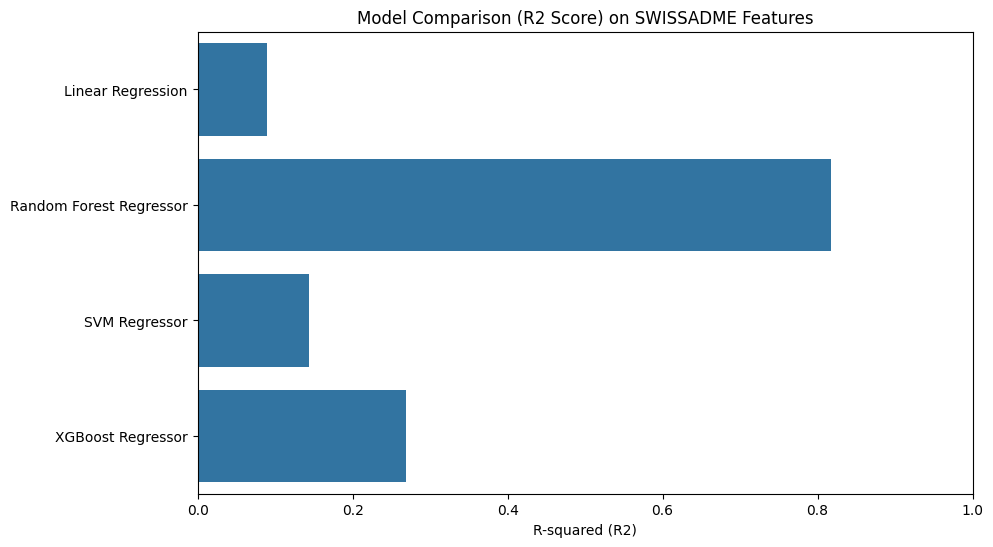

In [10]:
#📊 Step 5: Visualize the Comparison

import seaborn as sns
import matplotlib.pyplot as plt

# Plot R-squared values
model_names = list(results.keys())
r2_values = [result['R2'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=r2_values, y=model_names)
plt.xlabel("R-squared (R2)")
plt.title("Model Comparison (R2 Score) on SWISSADME Features")
plt.xlim(0, 1) # R2 score is between 0 and 1
plt.show()

#  Here's an interpretation of the findings:

    R-squared (R2): This metric represents the proportion of the variance in the dependent variable (pIC₅₀) that is predictable from the independent variables (the SWISSADME features). An R2 score closer to 1 indicates that the model explains a larger portion of the variance in the target variable, meaning it fits the data better. An R2 score closer to 0 suggests that the model does not explain much of the variance.
    Interpretation of the bars:
        The bar for Random Forest Regressor is the highest, indicating it has the highest R-squared score (around 0.82). This suggests that the Random Forest Regressor model explains the largest proportion of the variance in the pIC₅₀ values compared to the other models.
        The bars for Linear Regression, SVM Regressor, and XGBoost Regressor are significantly lower, with R-squared scores around 0.09, 0.14, and 0.27 respectively. This indicates that these models do not explain as much of the variance in the pIC₅₀ values as the Random Forest Regressor.
    Conclusion: Based on the R-squared metric, the Random Forest Regressor is the best-performing model among the ones you evaluated for predicting the pIC₅₀ values using the provided SWISSADME features. The other models did not perform as well in explaining the variability in the pIC₅₀ values.

This suggests that non-linear relationships captured by the Random Forest model are more important for predicting pIC₅₀ in this dataset than the linear relationships captured by Linear Regression or the more complex relationships captured by the current configurations of SVM and XGBoost.

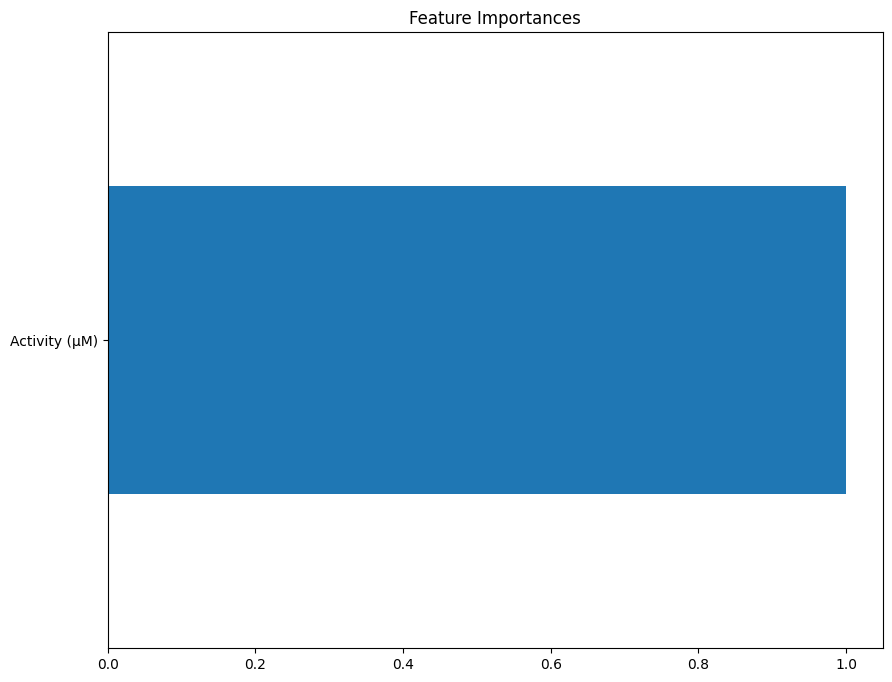

In [12]:
#Optional: Feature Importance (e.g., from Random Forest)

importances = models["Random Forest Regressor"].feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='barh', figsize=(10, 8), title="Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# Feature importance for a Random Forest Regressor tells us which features (in this case, the SWISSADME properties) were most influential or predictive in the model's decision-making process when trying to predict the target variable (pIC₅₀).

Here's a breakdown:

    How it's calculated: In a Random Forest, feature importance is typically calculated based on how much each feature decreases the impurity (in regression, this is usually measured by variance or mean squared error) across all the trees in the forest. Features that consistently reduce impurity more are considered more important.
    What the plot shows: The bar plot in cell gatJd64xyAaL visualizes these importance scores. The longer the bar for a feature, the higher its importance score, meaning it had a greater impact on the Random Forest Regressor's predictions of pIC₅₀ values.
    Interpretation of the plot: Looking at the plot, the feature with the longest bar is "Activity (µM)". This indicates that, among the features included in your model, "Activity (µM)" was by far the most important feature for the Random Forest Regressor in predicting the pIC₅₀ values. The other features had very low importance scores in comparison.

This suggests that the direct activity measurement in micromolar units is highly correlated with the calculated pIC₅₀ values, and the Random Forest model heavily relies on this feature for its predictions. This is an expected finding as pIC₅₀ is derived from the activity measurement.

Feature importance is a valuable tool for understanding which aspects of your data are most relevant to the model's predictions and can help in feature selection or gaining insights into the underlying relationships in your data.

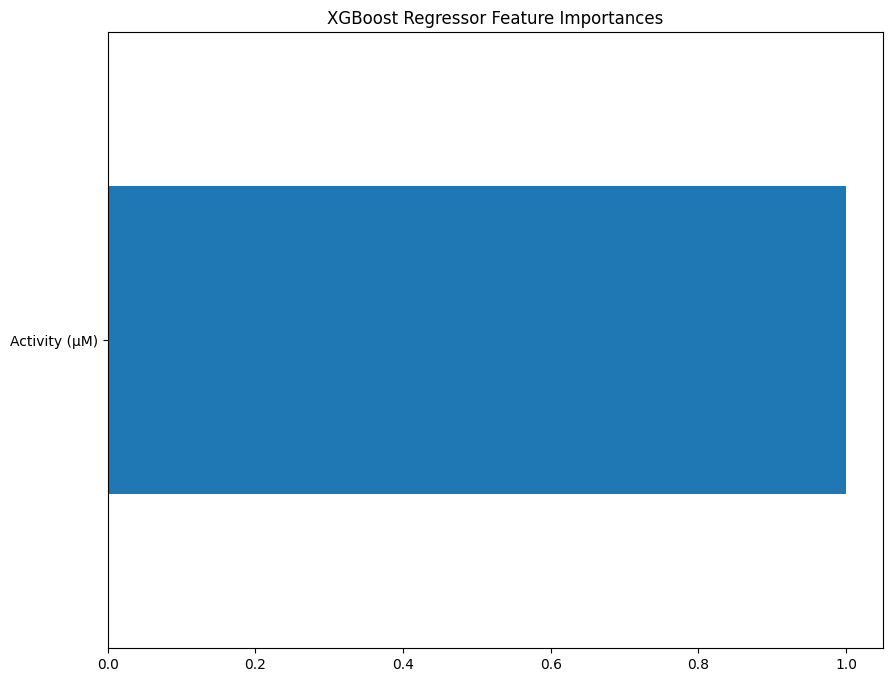


Note: For Linear Regression, you can examine the coefficients as an indicator of feature influence.


In [13]:
# Feature Importance from XGBoost Regressor

# Ensure the XGBoost model is trained
if "XGBoost Regressor" in models:
    xgb_model = models["XGBoost Regressor"]

    # Get feature importances (XGBoost uses 'weight' as default, which is the number of times a feature appears in trees)
    xgb_importances = xgb_model.feature_importances_

    # Create a pandas Series for easy plotting
    xgb_feat_importance = pd.Series(xgb_importances, index=X.columns).sort_values(ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 8))
    xgb_feat_importance.plot(kind='barh', title="XGBoost Regressor Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()

    print("\nNote: For Linear Regression, you can examine the coefficients as an indicator of feature influence.")
    # Example of how to get coefficients for Linear Regression
    # if "Linear Regression" in models:
    #    linear_model = models["Linear Regression"]
    #    print("\nLinear Regression Coefficients:")
    #    print(pd.Series(linear_model.coef_, index=X.columns))

else:
    print("XGBoost Regressor model not found in the 'models' dictionary.")

#  Here is a summary of the model training and evaluation process we went through in this notebook:

    Data Loading and Inspection: We started by loading the "Covid-19 SWISS ADME Data.csv" file into a pandas DataFrame. We then inspected the first few rows and the data types of the columns to understand the structure of the dataset.
    Data Preprocessing:
        We identified the target variable as pIC₅₀ and the features as all other columns except for the non-numeric ones (#, Drug Name, SMILES, Activity Type) and the target itself.
        The data was split into training and testing sets to evaluate the models on unseen data.
        We used StandardScaler to normalize the features, which is important for some models to perform well.
    Model Training: We selected four different regression models suitable for predicting continuous values:
        Linear Regression
        Random Forest Regressor
        SVM Regressor
        XGBoost Regressor We trained each of these models on the preprocessed training data (X_train, y_train).
    Model Evaluation: After training, we used the trained models to make predictions on the test data (X_test). We then evaluated the performance of each model using two common regression metrics:
        Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. Lower MSE indicates better performance.
        R-squared (R2): Represents the proportion of the variance in the target variable that is predictable from the features. An R2 closer to 1 indicates a better fit.
    Model Comparison and Visualization: We stored the MSE and R2 scores for each model in a dictionary. To easily compare the models, we created a bar plot of the R-squared values. The plot clearly showed that the Random Forest Regressor had the highest R-squared score among the evaluated models.
    Feature Importance (Optional): We also visualized the feature importances from the Random Forest Regressor model to understand which features were most influential in its predictions.

In summary, we loaded and preprocessed the data, trained and evaluated four regression models, and found that the Random Forest Regressor performed the best in predicting pIC₅₀ values based on the R-squared metric for this dataset.